Hello together,

in this binder, we take a look at the impact of different parameters on the accuracy of the models. In the following, the network architecture, epoch number, Optimizer, activation functions, as well as the batch size and learning rate are looked at.

Value was placed on the readability and the performance, while keeping the performance in the eye.
In the end, there is still a small data analysis to visualize the result.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sn

In [193]:
# %watermark -v -m -p numpy,tensorflow,pandas,seaborn,matplotlib

# print(" ")
# %watermark -u -b -t -z

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()
x_train, x_validation = x_train / 255.0, x_validation / 255.0

We take a look at what the network gets as input. To do this, we look at the first 50 numbers, just as the network processes them.

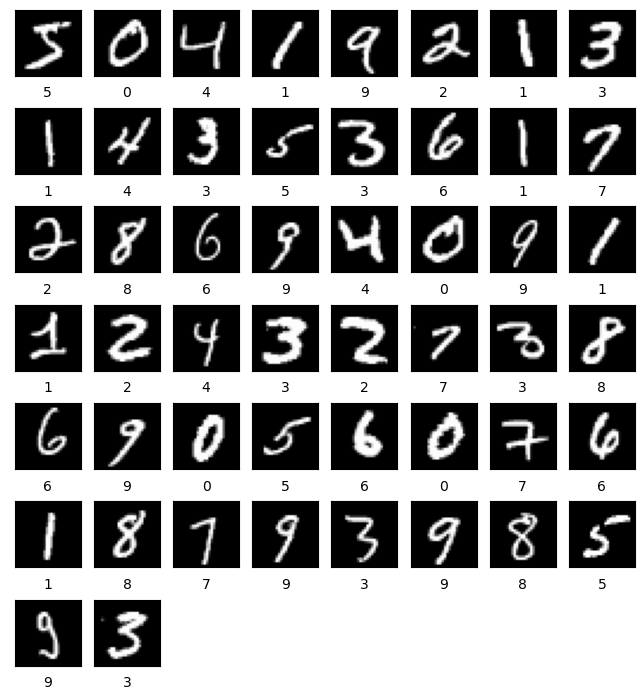

In [196]:
numbers_to_display = 50
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(8,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

## The first tests refer to different layer configurations:
The size of a network, its storage capacity, setting possibilities and ability to learn is determined. In the next part, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overfitted.
In the following, it is examined whether the number of layers and the neurons in a network also increases the accuracy of the predictions or whether it is overdue.
The number of patterns that a KNN can learn depends on the number of nodes. In conjunction with the number of layers, they indicate how many extensive patterns a network can learn. 

Model 1 is my benchmark in my whole test.

Various nodes and layers were considered for the investigation:


    Model 1  consists of     4 Layers * 512 neurons
    Model 2  consists of     2 Layers * 512 neurons
    Model 3  consists of     4 Layers * 256 neurons
    Model 4  consists of     4 Layers mit 512, 256, 128, 64 neurons

In [88]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
    
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#for Tensorboard
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history1 = model1.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp1 = model1.evaluate(x_validation, y_validation)
validation_acc = round(validation_acc_temp1 * 100, 4)
print('validation accuracy:', validation_acc )

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2134 - accuracy: 0.9361
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1033 - accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0773 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0614 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0518 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0427 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0397 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0357 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0299 - accuracy: 0.9913
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

In [89]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp2 = model2.evaluate(x_validation, y_validation)
validation_acc2 = round(validation_acc_temp2 * 100, 4)
print('validation accuracy2:', validation_acc2, '%')

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1846 - accuracy: 0.9442
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0808 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0560 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0421 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0195 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

In [189]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp3 = model3.evaluate(x_validation, y_validation)
validation_acc3 = round(validation_acc_temp3 * 100, 4)
print('validation accuracy3:', validation_acc3, '%')

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2138 - accuracy: 0.9347
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1021 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0764 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0599 - accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0350 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0313 - accuracy: 0.9909
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

In [190]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(optimizer='Adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=10, shuffle=True)

_, validation_acc_temp4 = model4.evaluate(x_validation, y_validation)
validation_acc4 = round(validation_acc_temp4 * 100, 4)
print('validation accuracy4:', validation_acc4, '%')

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2470 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1204 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0913 - accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0746 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0653 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0562 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0471 - accuracy: 0.9856
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0390 - accuracy: 0.9879
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

After which the models have been learned and validated, we come to the first comparison. The accuracy of the validation data is compared to Model 1. All networks learn 10 epochs and have the same compile configurations.

In [197]:
print('accuracy of Benchmark: ' ,validation_acc, '%')
print('accuracy of Model 2:   ' ,validation_acc2, '%')
print('accuracy of Model 3:   ' ,validation_acc3, '%')
print('accuracy of Model 4:   ' ,validation_acc4, '%\n')

Diff1 = round(validation_acc - validation_acc2, 4)
print("difference from Model 2 to Model 1 is: ", Diff1, "%")
Diff2 = round(validation_acc - validation_acc3, 4)
print("difference from Model 3 to Model 1 is: ", Diff2, "%")
Diff3 = round(validation_acc - validation_acc4, 4)
print("difference from Model 4 to Model 1 is: ", Diff3, "%")

accuracy of Benchmark:  97.89 %
accuracy of Model 2:    98.06 %
accuracy of Model 3:    97.98 %
accuracy of Model 4:    97.48 %

difference from Model 2 to Model 1 is:  -0.17 %
difference from Model 3 to Model 1 is:  -0.09 %
difference from Model 4 to Model 1 is:  0.41 %


Model 2 and 4 are only slightly more accurate and Model 3 is inaccurate.
You don't see any big improvements in this simple network. Accuracy also fluctuates slightly. 
It should be noted, however, that Model 3, with 0.2 of Model 1's learning time, produces almost the same accuracy.

The size and the convoluity have an influence on the over- or underfitting of the net.

Ein Layer mit wenigen Neuronen kann möglicherweise nicht genügend Kapazität haben, um komplexe Muster in den Daten zu erkennen, während ein Layer mit zu vielen Neuronen möglicherweise übermäßig kompliziert ist und somit schwer zu trainieren ist. Es gibt keine festen Regeln für die Auswahl der Anzahl von Neuronen in einem Layer, und es ist oft erforderlich, verschiedene Anzahlen von Neuronen zu testen, um die beste Leistung zu erzielen.

In der Regel wird jedoch empfohlen, die Anzahl der Neuronen in jedem Layer zu erhöhen, wenn das Netz tiefer wird, da dies dem Netz mehr Kapazität gibt, um komplexere Muster zu erkennen. Es ist jedoch wichtig zu beachten, dass eine zu große Anzahl von Neuronen auch dazu führen kann, dass das Netz übermäßig kompliziert wird und somit schwer zu trainieren ist.

Here is the accuracy and the Loss of Model1-4 shown:

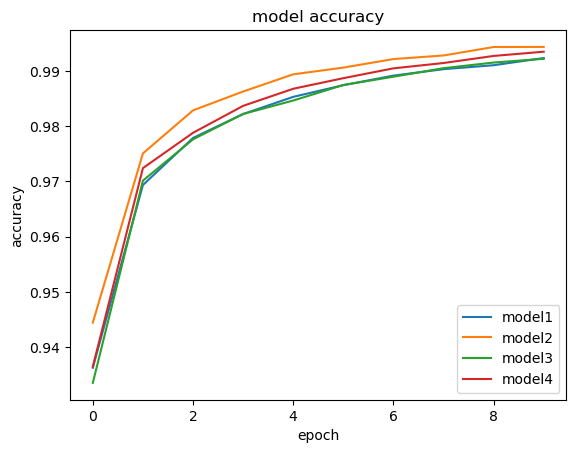

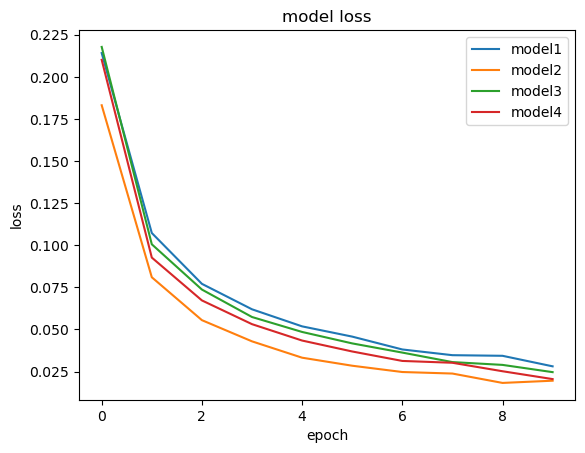

In [52]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='lower right')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model1', 'model2', 'model3', 'model4'], loc='upper right')
plt.show()

In the first diagram, therefore, the accuracy diagram shows that Model 2 had the highest accuracy in the learning set, and thus also the largest deviation to the validation set.

In the loss diagram it can also be seen that Model 1,3,4 is relatively close to each other, but the Loss of Model 2 is again visibly lower, which fits to the accuracy diagram.

## In germany we say "Übung macht den Meister" and i think that's beautiful.
In the language of the neural networks, a single pass through the feedback loop is often referred to as an epoch. So the larger the number of epochs of a neural network, the longer it has been trained.

In the next step, we're looking at the influence of the epochs.

In [59]:
epoch_list = [2, 7, 20]
history_epochs_list = [0,0,0]
validation_epochs_list = [0,0,0]
for i in range(3):
    temp_modelname = 'model' + str(epoch_list[i])
    name = 'model' + str(epoch_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer= 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = temp_modelname.fit(x_train, y_train, epochs= epoch_list[i], shuffle=True)
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_epochs_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_epochs_list[i], ' %\n' )

Epoch 1/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2110 - accuracy: 0.9376
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 0.1110 - accuracy: 0.9687
validation accuracy of model2 is: 96.87  %

Epoch 1/7
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2128 - accuracy: 0.9364
Epoch 2/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1082 - accuracy: 0.9694
Epoch 3/7
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0765 - accuracy: 0.9780
Epoch 4/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0606 - accuracy: 0.9824
Epoch 5/7
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 6/7
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0449 - accuracy: 0.9873
Epoch 7/7
313/313 [==============================] - 1s 4ms/step - loss: 0.0942 - accuracy: 0.9788
validation accuracy of model7 is: 97.

In [156]:
print('accuracy of Benchmark:    ', validation_acc, '%')
print('accuracy of Model ep_2:   ', validation_epochs_list[0], '%')
print('accuracy of Model ep_7:   ', validation_epochs_list[1], '%')
print('accuracy of Model ep_20:  ', validation_epochs_list[2], '%\n')

Diff_ep2 = round(validation_acc - validation_epochs_list[0], 4)
print("difference from Model_ep2 to Model 1 is:  ", Diff_ep2, "%")
Diff_ep7 = round(validation_acc - validation_epochs_list[1], 4)
print("difference from Model_ep7 to Model 1 is:  ", Diff_ep7, "%")
Diff_ep20 = round(validation_acc - validation_epochs_list[2], 4)
print("difference from Model_ep20 to Model 1 is: ", Diff_ep20, "%")

accuracy of Benchmark:     97.89 %
accuracy of Model ep_2:    96.38 %
accuracy of Model ep_7:    97.88 %
accuracy of Model ep_20:   98.26 %

difference from Model_ep2 to Model 1 is:   1.51 %
difference from Model_ep7 to Model 1 is:   0.01 %
difference from Model_ep20 to Model 1 is:  -0.37 %


I can confirm my thesis "exercise makes perfect". The longer the model learns, the more accurate the prediction. Too much learning leads to overfitting and the network learns the training set by heart, which makes many errors happen at the validation set. Overfitting can be prevented by applying the dropout technique. In this case, one observation is in each case randomly excluded from the algorithm. This will affect all other connections of the nodes. The dropout method will not be tried in the following tests.

## After we have looked at the layer structures and the learning epochs, we will test different optimizer in the next step.
When training deep learning models, it is essentially a matter of adapting the weightings of the neural network until the global minimum of the loss function is found. The Optimizer is responsible for this task. The most suitable Optimizer for most applications are based on the gradient stage method, in which the weightings are calculated using the gradient of the loss function.
Here we look at the Optimizer: 'Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', ' SGD nearer.

**Adam Optimizer** in benchmark model:
A combination of the idea of the Momentum optimizer and RMSProp results in the Adam optimization.
Adam is the abbreviation for Adaptive Torque Estimation. In the case of the combination, the method now considers both the average of the previous gradients (momentum optimizers) and the average of the squared gradients (**RMSProp, Adadelta, Adagrad**), both under exponential decay.

A function that changes per iteration (for example, by implementing stochastics or mini-batch gradient procedures).
A change from Adam is obtained by replacing the portion of the Momentum optimizer with that of Nesterov. This is then called Nadam ("Nesterovs Adaptive Moment Estimation").
**Adamax**, a variant of Adam based on the infinity norm, is a first-order gradient-based optimization method. 

The optimizer **SGD** (Stochastic Gradient Descent) calculates only stochastic methods. SGD by itself is inherently sequential: Step-by-step, we progress further towards the minimum. Running it provides good convergence but can be slow particularly on large datasets. 

source: https://docplayer.org/201945619-Numerische-optimierung-fuer-deep-learning-algorithmen.html

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2088 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0828 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0333 - accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0102 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 10/10
313/313 [==============================] - 1s 4ms/st

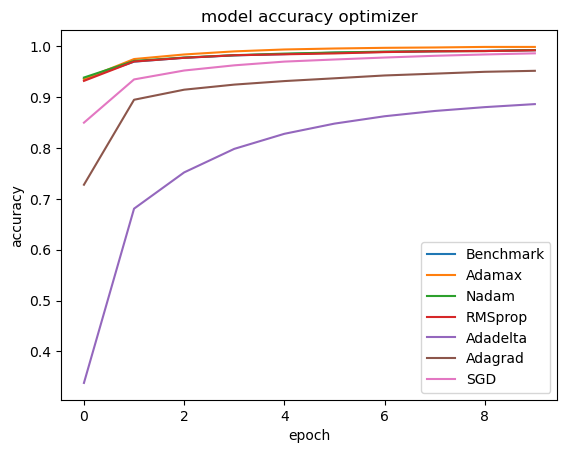

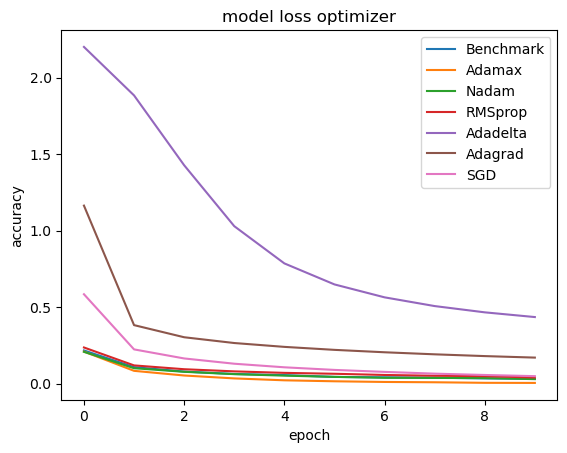

In [81]:
optimizer_list = ['Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD']
history_optimizer_list = [0,0,0,0,0,0]
validation_optimizer_list = [0,0,0,0,0,0]
for i in range(6):
    temp_modelname = 'model_' + str(optimizer_list[i])
    name = 'model_' + str(optimizer_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer=optimizer_list[i],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_optimizer_list[i] = temp_modelname.fit(x_train, y_train, epochs= 10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_optimizer_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_optimizer_list[i], ' %\n' )
    
    if i == 5:
        plt.plot(history1.history['accuracy'])
        plt.plot(history_optimizer_list[0].history['accuracy'])
        plt.plot(history_optimizer_list[1].history['accuracy'])
        plt.plot(history_optimizer_list[2].history['accuracy'])
        plt.plot(history_optimizer_list[3].history['accuracy'])
        plt.plot(history_optimizer_list[4].history['accuracy'])
        plt.plot(history_optimizer_list[5].history['accuracy'])
        plt.title('model accuracy optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='lower right')
        plt.show()
        
        plt.plot(history1.history['loss'])
        plt.plot(history_optimizer_list[0].history['loss'])
        plt.plot(history_optimizer_list[1].history['loss'])
        plt.plot(history_optimizer_list[2].history['loss'])
        plt.plot(history_optimizer_list[3].history['loss'])
        plt.plot(history_optimizer_list[4].history['loss'])
        plt.plot(history_optimizer_list[5].history['loss'])
        plt.title('model loss optimizer')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Benchmark','Adamax', 'Nadam', 'RMSprop', 'Adadelta', 'Adagrad', 'SGD'], loc='upper right')
        plt.show()

In [160]:
print('accuracy of Benchmark:      ', validation_acc, '%')
print('accuracy of Model Adamax:   ', validation_optimizer_list[0], '%')
print('accuracy of Model Nadam:    ', validation_optimizer_list[1], '%')
print('accuracy of Model RMSprop:  ', validation_optimizer_list[2], '%')
print('accuracy of Model Adadelta: ', validation_optimizer_list[3], '%')
print('accuracy of Model Adagrad:  ', validation_optimizer_list[4], '%')
print('accuracy of Model SGD:      ', validation_optimizer_list[5], '%\n')

Diff_Adamax = round(validation_acc - validation_optimizer_list[0], 4)
print("difference from Adamax to Model 1 is:    ", Diff_Adamax, "%")
Diff_Nadam = round(validation_acc - validation_optimizer_list[1], 4)
print("difference from Nadam to Model 1 is:     ", Diff_Nadam, "%")
Diff_RMSprop = round(validation_acc - validation_optimizer_list[2], 4)
print("difference from RMSprop to Model 1 is:   ", Diff_RMSprop, "%")
Diff_Adadelta = round(validation_acc - validation_optimizer_list[3], 4)
print("difference from Adadelta to Model 1 is:  ", Diff_Adadelta, "%")
Diff_Adagrad = round(validation_acc - validation_optimizer_list[4], 4)
print("difference from Adagrad to Model 1 is:   ", Diff_Adagrad, "%")
Diff_SGD = round(validation_acc - validation_optimizer_list[5], 4)
print("difference from SGD to Model 1 is:       ", Diff_SGD, "%")

accuracy of Benchmark:       97.89 %
accuracy of Model Adamax:    98.11 %
accuracy of Model Nadam:     97.88 %
accuracy of Model RMSprop:   97.97 %
accuracy of Model Adadelta:  89.39 %
accuracy of Model Adagrad:   95.05 %
accuracy of Model SGD:       97.28 %

difference from Adamax to Model 1 is:     -0.22 %
difference from Nadam to Model 1 is:      0.01 %
difference from RMSprop to Model 1 is:    -0.08 %
difference from Adadelta to Model 1 is:   8.5 %
difference from Adagrad to Model 1 is:    2.84 %
difference from SGD to Model 1 is:        0.61 %


In this example, all the tested opizimers are worse than Adam, except Adamax and RMSprop.
Where the accuracy only fluctuates very slightly around the benchmark.
Adadelta is particularly unsuitable, and the Adagrad, which is related to him.

Depending on the performance of the optimizer, the learningrate is because each optimizer has its full potential at a different learning rate. We should know that dependence, but we will not test it.

## Next test with various activation functions

We need to use activation functions such as ReLu, Sigmoid and tanh to give the neural network a nonlinear property. In this way, the network can model more complex relationships and patterns in the data. At this point we should use the most important activation functions that are used in deep learning.

In Benchmark we use **ReLU**. The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back.

**Softmax** is always applied here in the last layer and only if the neural network is to predict probability values in classification tasks.

**SoftPlus** is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.
For numerical stability the implementation reverts to the linear function for inputs above a certain value.

**Tanh** is like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped). The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

As an alternative to hyperbolic tangent, softsign is an activation function for neural networks. Even though tanh and softsign functions are closely related, tanh converges exponentially whereas softsign converges polynomially. Even though softsign appears in literature, it would not be adopted in practice as much as tanh.

In [149]:
activation_list = ['sigmoid', 'softplus', 'tanh', 'softsign']
history_activation_list = [0,0,0,0]
validation_activation_list = [0,0,0,0]
for i in range(4):
    name = 'model_' + str(activation_list[i])
    temp_modelname = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
    
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
      tf.keras.layers.Dense(512, activation= activation_list[i]),
    
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    temp_modelname.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_activation_list[i] = temp_modelname.fit(x_train, y_train, epochs= 10, shuffle=True)
    
    
    _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
    validation_activation_list[i] = round(validation_temp * 100, 4)
    print('validation accuracy of', name, 'is:', validation_activation_list[i], ' %\n' )

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4154 - accuracy: 0.8657
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1544 - accuracy: 0.9535
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1041 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0759 - accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0600 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0456 - accuracy: 0.9857
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0367 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0308 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [151]:
print('accuracy of Benchmark:        ', validation_acc, '%')
print('accuracy of Model sigmoid:    ', validation_activation_list[0], '%')
print('accuracy of Model softplus:   ', validation_activation_list[1], '%')
print('accuracy of Model softsign:   ', validation_activation_list[2], '%')
print('accuracy of Model tanh:       ', validation_activation_list[3], '%\n')

Diff_sigmoid = round(validation_acc - validation_activation_list[0], 4)
print("difference from Model sigmoid to Model 1 is:     ", Diff_sigmoid, "%") 
Diff_softplus = round(validation_acc - validation_activation_list[1], 4)
print("difference from Model softplus to Model 1 is:    ", Diff_softplus, "%") 
Diff_softsign = round(validation_acc - validation_activation_list[2], 4)
print("difference from Model softsign to Model 1 is:    ", Diff_softsign, "%")
Diff_tanh = round(validation_acc - validation_activation_list[3], 4)
print("difference from Model tanh to Model 1 is:        ", Diff_tanh, "%")

accuracy of Benchmark:         97.89 %
accuracy of Model sigmoid:     98.0 %
accuracy of Model softplus:    98.33 %
accuracy of Model softsign:    97.07 %
accuracy of Model tanh:        97.45 %

difference from Model sigmoid to Model 1 is:      -0.11 %
difference from Model softplus to Model 1 is:     -0.44 %
difference from Model softsign to Model 1 is:     0.82 %
difference from Model tanh to Model 1 is:         0.44 %


From the evaluation, it can be seen that sigmoid has a similar accuracy. Softsign and tanh are approx. 0.5%-0,8% worse. The best activation function is the softplus.

For example, if the neural network is to predict values that are greater than 1, tanh or sigmoid is not appropriate for the output layer, and we must use ReLU or similar activation functions instead. On the other hand, if you expect the output values to be in the range [0, 1] or [-1, 1], then ReLU is not a good choice for the output layer and you have to use sigmoid, tanh, or similar. However, as far as the hidden layers are concerned, I would recommend that you always use ReLU as an activation for these layers.

## As last, we change the batchsize and the learningrate

The most important parameter in the training of deep learning models with the gradient stage method is the learning rate of the optimizer. It specifies the step size with which the direction to the minimum of the loss function is sought after each iteration. The direction itself is determined by the gradient of the loss function. The step size is determined by the amount of the gradient, as well as the learning rate as a pre-factor. Too large a step size or The learning rate can lead to the minimum being skipped and thus "overlooked". With very narrow minima, it can happen at too big a step that one jumps out of the valley again. In turn, too small a learning rate can lead to the fact that one is stuck in an undesirable local minimum. In addition, the system converges more slowly with a small step size, whereby the training time is extended.

The batch size defines how many samples from the record are processed simultaneously in a training iteration. The training data record is thus divided into "batches", which are then propagated successively through the system until the entire data record has been passed through and thus the epoch is completed. For small data sets that fit completely into the existing memory, the BatchSize can also contain the entire data set, which means that the epoch consists of only a single pass. As a rule, however, this is not the case, which is why the subdivision into smaller batches makes sense. In the specialist literature, the batch is also frequently referred to as a mini-batch, in order to make the distinction to the complete data set clear. Since, after each iteration, the weights in the model are adjusted to the findings from the currently used batch, the choice of the batch-size influence on the training results also has.

source:https://www.aime.info/de/blog/resnet50-training-with-imagenet/

Epoch 1/10
79/79 [==============================] - 5s 41ms/step - loss: 0.7806 - accuracy: 0.7891
Epoch 2/10
79/79 [==============================] - 4s 45ms/step - loss: 0.1564 - accuracy: 0.9538
Epoch 3/10
79/79 [==============================] - 3s 42ms/step - loss: 0.1118 - accuracy: 0.9664
Epoch 4/10
79/79 [==============================] - 4s 48ms/step - loss: 0.0943 - accuracy: 0.9714
Epoch 5/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0786 - accuracy: 0.9754
Epoch 6/10
79/79 [==============================] - 3s 42ms/step - loss: 0.0757 - accuracy: 0.9769
Epoch 7/10
79/79 [==============================] - 3s 41ms/step - loss: 0.0551 - accuracy: 0.9824
Epoch 8/10
79/79 [==============================] - 3s 41ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 9/10
79/79 [==============================] - 3s 43ms/step - loss: 0.0482 - accuracy: 0.9847
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9692
validati

235/235 [==============================] - 5s 22ms/step - loss: 0.0854 - accuracy: 0.9736
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0570 - accuracy: 0.9821
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
235/235 [==============================] - 6s 23ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0285 - accuracy: 0.9909
Epoch 7/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 8/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 9/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9779
validation accuracy of model_b256_l0.001 is: 97.79  %

Epoch 1/10
235/235 [===========================

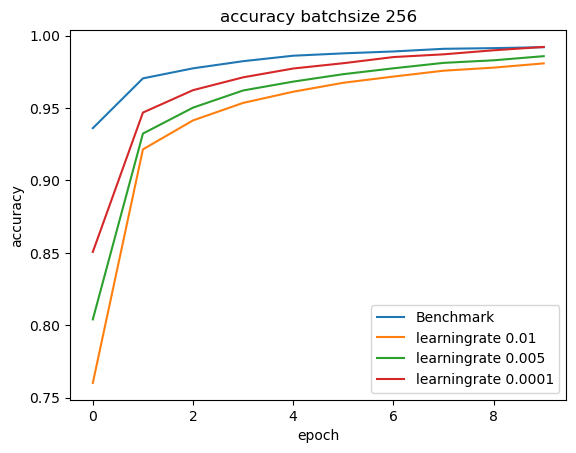

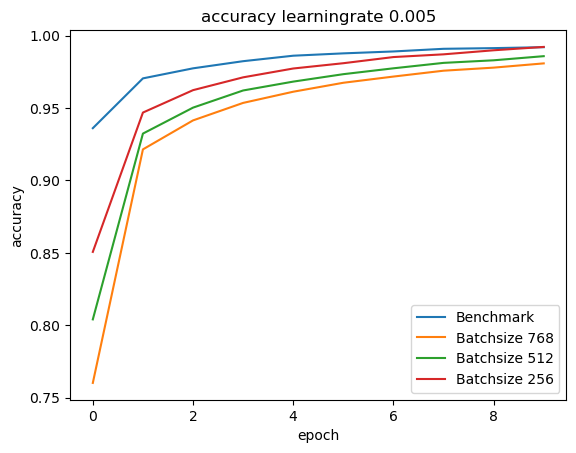

In [116]:
learningrate_list = [0.01, 0.001, 0.0001]
batchsize_list = [768, 512, 256]
history_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
validation_bs_lr_list = [0, 0, 0, 0, 0, 0, 0, 0, 0]
i = 0
for b in range(3):
    for l in range(3):
        temp_modelname = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        name = 'model_b' + str(batchsize_list[b]) +'_l' + str(learningrate_list[l])
        temp_modelname = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

        temp_modelname.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learningrate_list[l]),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
        history_bs_lr_list[i] = temp_modelname.fit(x_train, y_train, batch_size= batchsize_list[b], epochs= 10, shuffle=True)
    
    
        _, validation_temp = temp_modelname.evaluate(x_validation, y_validation)
        validation_bs_lr_list[i] = round(validation_temp * 100, 4)
        print('validation accuracy of', name, 'is:', validation_bs_lr_list[i], ' %\n' )
        if i == 8:
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy batchsize 256')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark','learningrate 0.01','learningrate 0.001', 'learningrate 0.0001'], loc='lower right')
            plt.show()
        
            plt.plot(history1.history['accuracy'])
            plt.plot(history_bs_lr_list[2].history['accuracy'])
            plt.plot(history_bs_lr_list[5].history['accuracy'])
            plt.plot(history_bs_lr_list[8].history['accuracy'])
                                                               
            plt.title('accuracy learningrate 0.001')
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['Benchmark', 'Batchsize 768','Batchsize 512', 'Batchsize 256'], loc='lower right')
            plt.show()
        i = i+1

In [198]:
print('accuracy of Model b768_l01:    ', validation_bs_lr_list[0], '%')
print('accuracy of Model b768_l001:   ', validation_bs_lr_list[1], '%')
print('accuracy of Model b768_l0001:  ', validation_bs_lr_list[2], '%\n')

print('accuracy of Model b512_l01:    ', validation_bs_lr_list[3], '%')
print('accuracy of Model b512_l001:   ', validation_bs_lr_list[4], '%')
print('accuracy of Model b512_l0001:  ', validation_bs_lr_list[5], '%\n')

print('accuracy of Model b256_l01:    ', validation_bs_lr_list[6], '%')
print('accuracy of Model b256_l001:   ', validation_bs_lr_list[7], '%')
print('accuracy of Model b256_l0001:  ', validation_bs_lr_list[8], '%\n')

accuracy of Model b768_l01:     96.92 %
accuracy of Model b768_l001:    98.24 %
accuracy of Model b768_l0001:   97.19 %

accuracy of Model b512_l01:     96.85 %
accuracy of Model b512_l001:    97.88 %
accuracy of Model b512_l0001:   97.42 %

accuracy of Model b256_l01:     97.16 %
accuracy of Model b256_l001:    97.79 %
accuracy of Model b256_l0001:   97.55 %



After variation of the batch size: 256, 512, 768 and learningrate: 0.01, 0.005, 0.0001, it can be seen that the learningrate of 0.005 is best at each batchsize. If you look at the different batchsizes at this Learningrate, you can see that a lower batch size achieves higher accuracy (see chart Batchsize). A smaller batch size than 256 converges faster, but has a lower validation accuracy. Larger batchsizes needs less trainingtime, but are also inaccurate.

If batch size remains the same, it becomes clear that smaller batch sizes need more epochs to obtain the same accuracy, so learningrate 0.0001 with more epochs will be more accurate than graph of the learningrate 0.01.
If the Learningrate is constant, it becomes recognizable again that the accuracy at 6 epochs is more evident than at 10 epochs, from this it can be revealed that the 3 graphs are closer to closer to more epochs.
<img src = 'Bild1.png'>
credit:https://wandb.ai/wandb_fc/german/reports/Was-ist-die-optimale-Batch-Gr-e-um-ein-neuronales-Netz-zu-trainieren---Vmlldzo1NTcwMjk#:~:text=Wir%20verwenden%20kein%20über-parametrisiertes,Batch-Größen%20für%2025%20Epochen.

##Best of

In [155]:
temp = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
    
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dense(2048, activation='relu'),

    
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

temp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
history_temp = temp.fit(x_train, y_train, batch_size=32, epochs=20, shuffle=True)
    
    
_, validation_bestof_temp = temp.evaluate(x_validation, y_validation)
validation_acc_test = round(validation_bestof_temp * 100, 4)
print('validation accuracy is:', validation_acc_test, ' %\n' )

Epoch 1/20
1875/1875 [==============================] - 255s 136ms/step - loss: 0.1961 - accuracy: 0.9413
Epoch 2/20
1875/1875 [==============================] - 256s 137ms/step - loss: 0.0719 - accuracy: 0.9772
Epoch 3/20
1875/1875 [==============================] - 252s 134ms/step - loss: 0.0451 - accuracy: 0.9860
Epoch 4/20
1875/1875 [==============================] - 251s 134ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 5/20
1875/1875 [==============================] - 251s 134ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 6/20
1875/1875 [==============================] - 251s 134ms/step - loss: 0.0201 - accuracy: 0.9938
Epoch 7/20
1875/1875 [==============================] - 254s 135ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 8/20
1875/1875 [==============================] - 261s 139ms/step - loss: 0.0146 - accuracy: 0.9956
Epoch 9/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0135 - accuracy: 0.9959
Epoch 10/20
1875/1875 [=======================

## Small Evaluation

In [162]:
temp.save('temp', save_format='h5')
predictions = tf.keras.models.load_model('temp').predict([x_validation])
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 10s 31ms/step


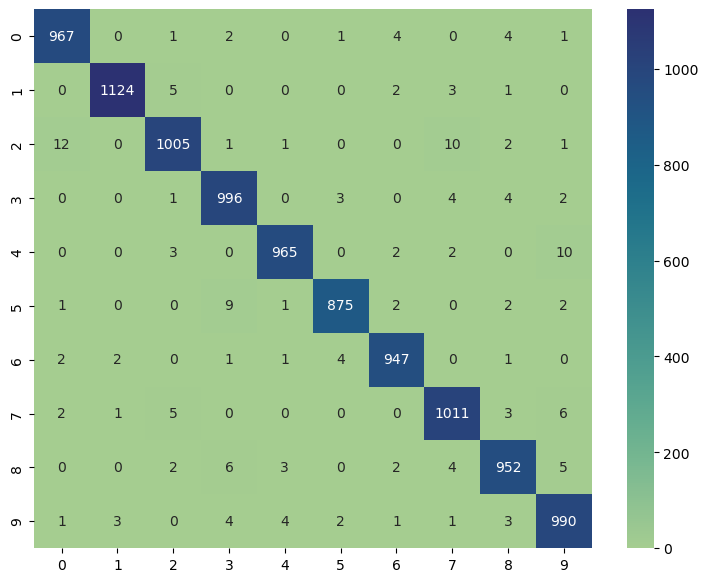

In [182]:
confusion_matrix = tf.math.confusion_matrix(y_validation, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap='crest', 
)
plt.show()

In [ ]:
#JustForFun
#%tensorboard --logdir log/fit

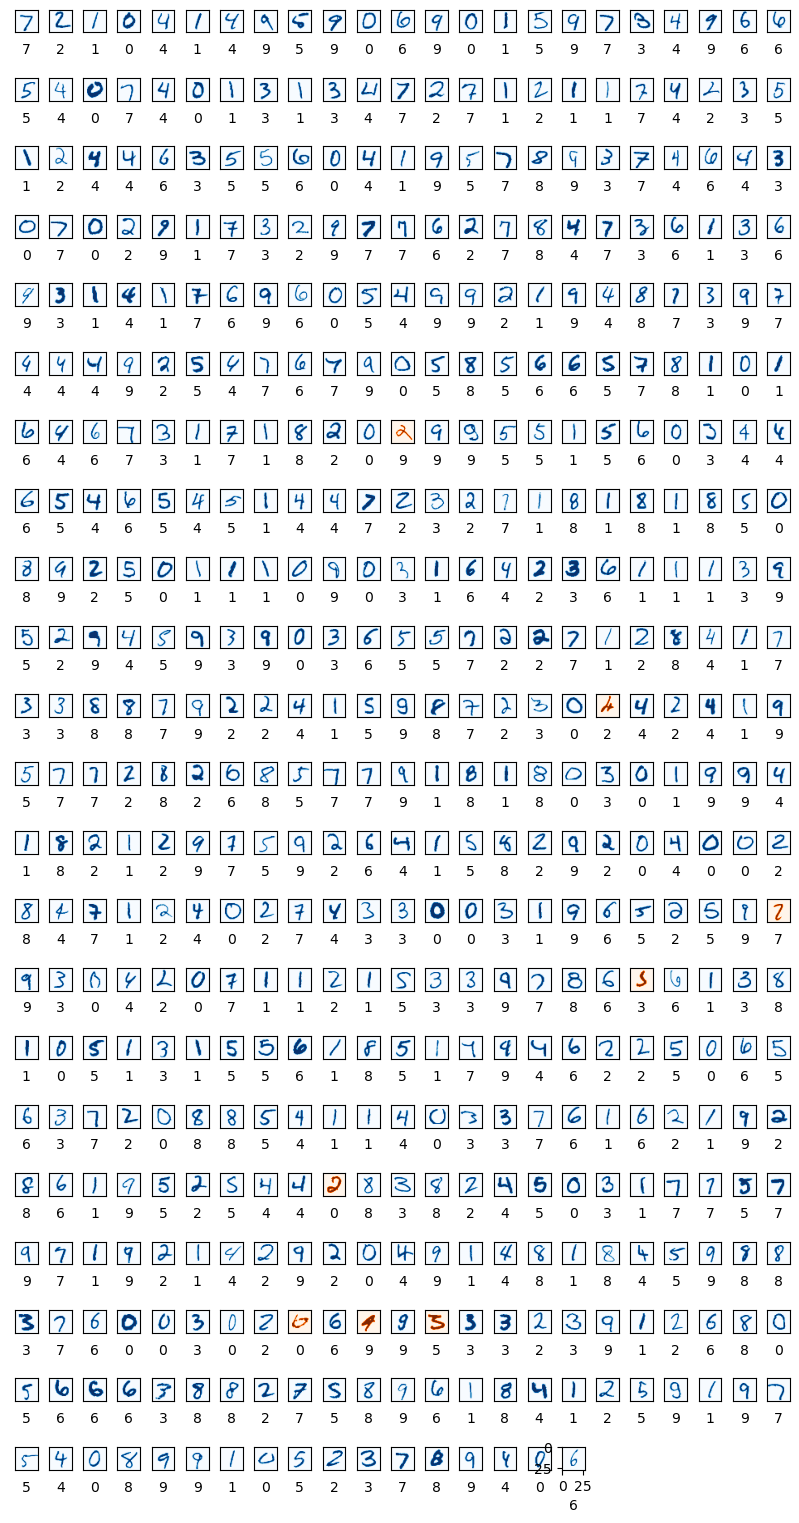

In [186]:
numbers_to_display = 500
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 20))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Blues' if predicted_label == y_validation[plot_index] else 'Oranges'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

At the beginning, we looked at the input, now the ouput, green are the report predicted numbers and red the wrong.
To ensure the overview, we only filter out the wrong predictions and look at how the network has decided.

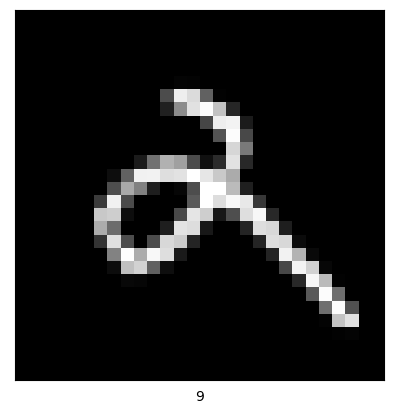

1/1 [==============================] - 0s 186ms/step
[[0.   0.   0.94 0.06 0.   0.   0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


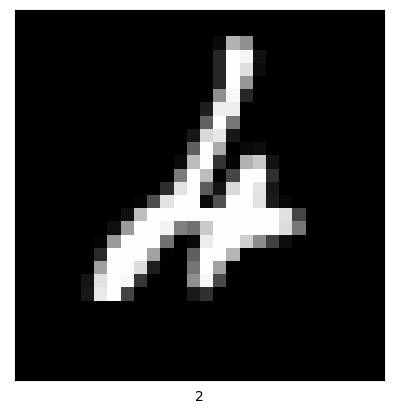

1/1 [==============================] - 0s 22ms/step
[[0.01 0.   0.44 0.   0.   0.   0.54 0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


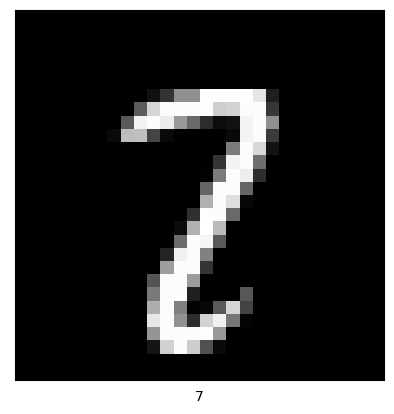

1/1 [==============================] - 0s 30ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


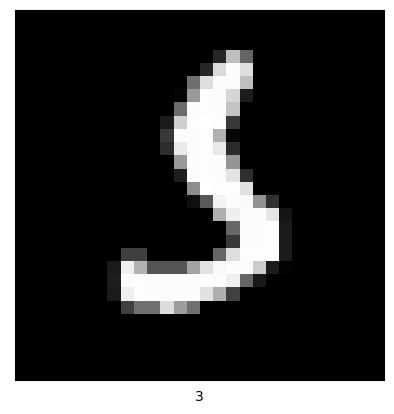

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


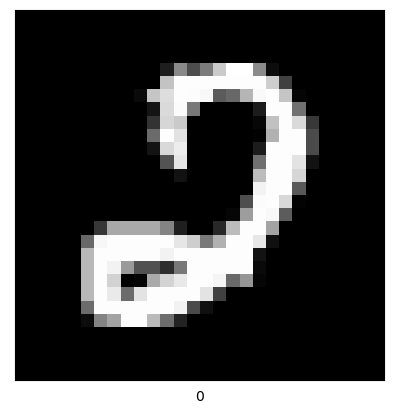

1/1 [==============================] - 0s 21ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


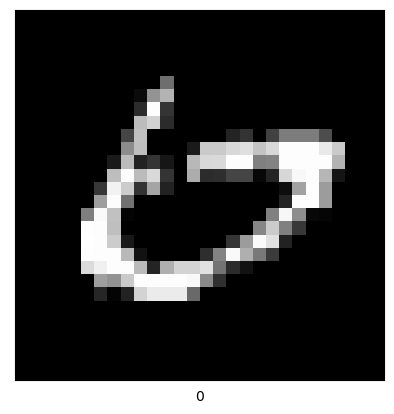

1/1 [==============================] - 0s 22ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


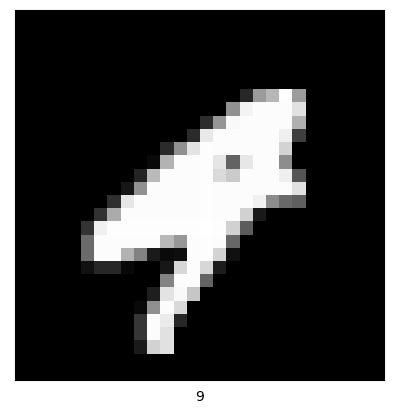

1/1 [==============================] - 0s 20ms/step
[[0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.03]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


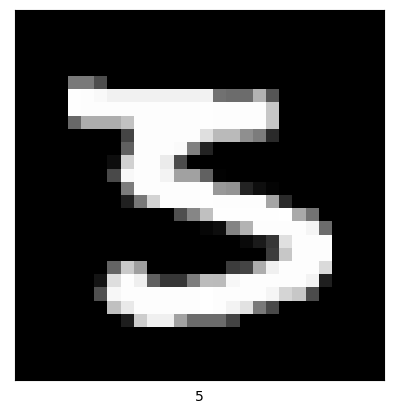

1/1 [==============================] - 0s 22ms/step
[[0.   0.   0.   0.06 0.   0.94 0.   0.   0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


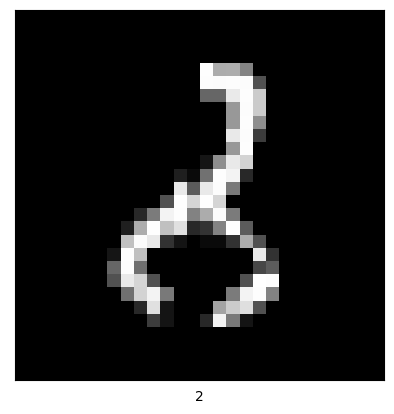

1/1 [==============================] - 0s 21ms/step
[[0.   0.   0.48 0.38 0.   0.   0.   0.   0.14 0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


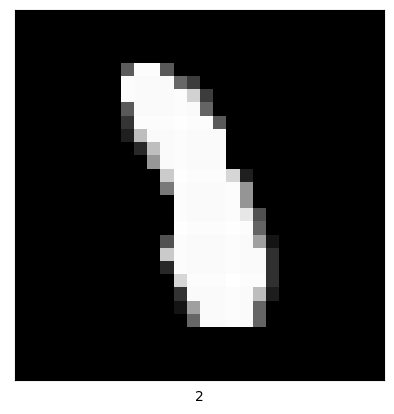

1/1 [==============================] - 0s 20ms/step
[[0.   0.01 0.05 0.04 0.   0.   0.   0.   0.89 0.01]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


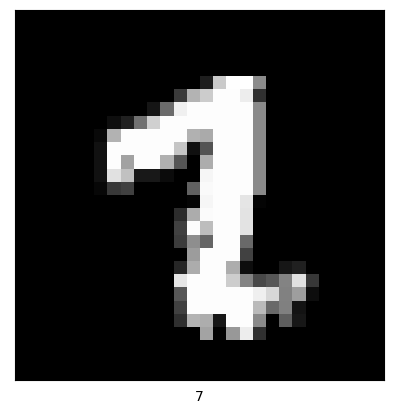

1/1 [==============================] - 0s 21ms/step
[[0.01 0.17 0.31 0.22 0.01 0.01 0.   0.13 0.11 0.02]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


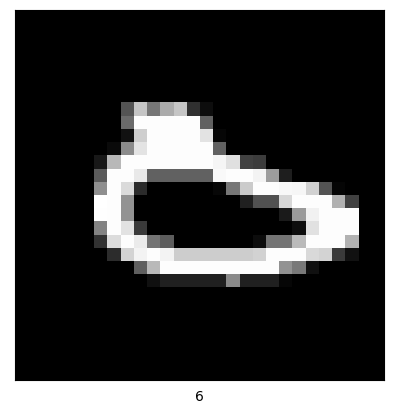

1/1 [==============================] - 0s 22ms/step
[[0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0. ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


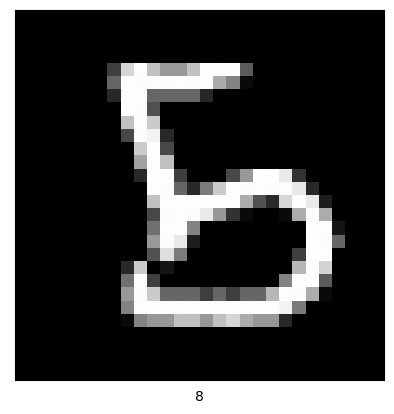

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


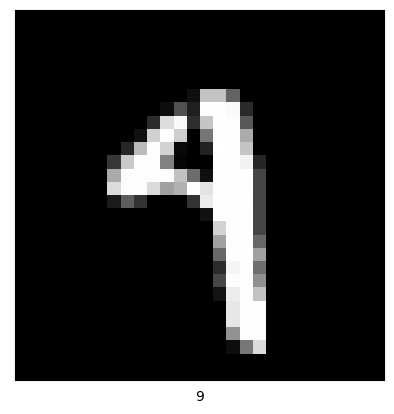

1/1 [==============================] - 0s 21ms/step
[[0.   0.   0.   0.   0.23 0.   0.   0.   0.   0.77]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


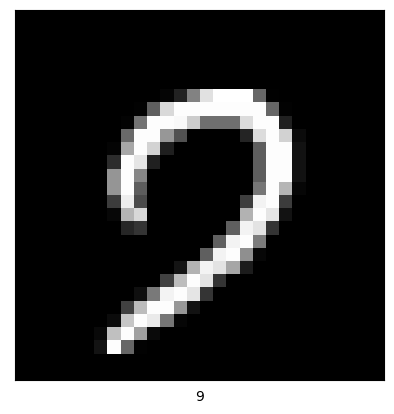

1/1 [==============================] - 0s 21ms/step
[[0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


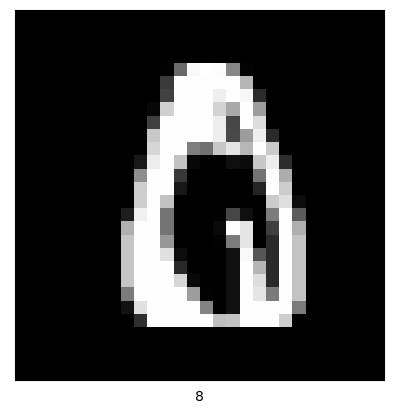

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


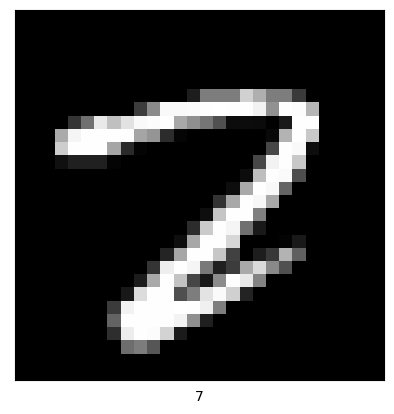

1/1 [==============================] - 0s 22ms/step
[[0.   0.01 0.81 0.03 0.   0.   0.   0.15 0.   0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


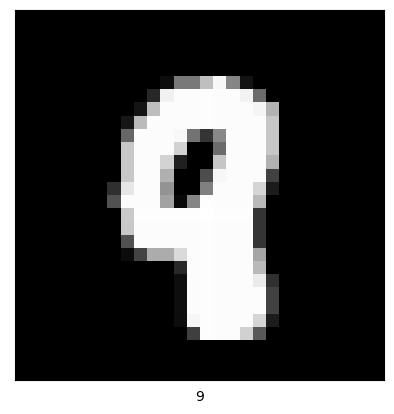

1/1 [==============================] - 0s 21ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.31 0.68]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


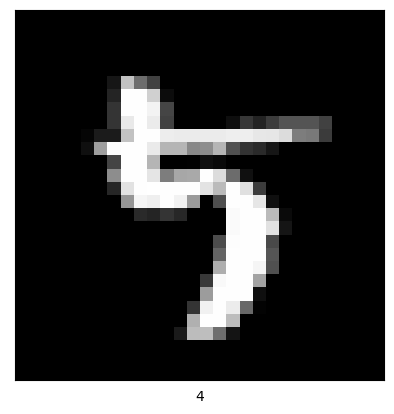

1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


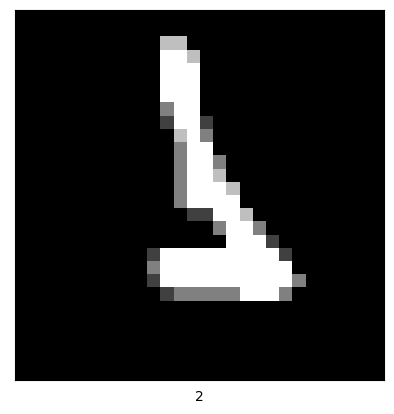

1/1 [==============================] - 0s 21ms/step
[[0.   0.13 0.02 0.23 0.   0.02 0.   0.   0.6  0.  ]]
[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]


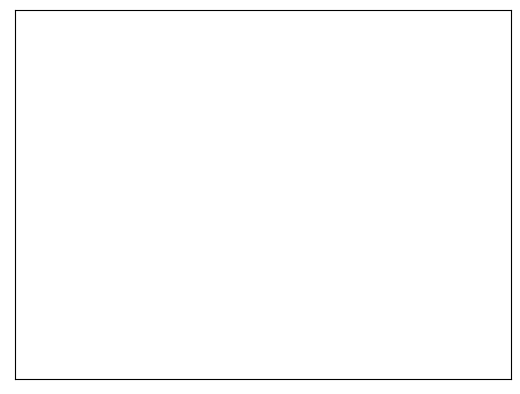

In [167]:
for plot_index in range(1000): 
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if predicted_label != y_validation[plot_index]:
        plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap='gray')
        plt.xlabel(predicted_label)
        plt.show()
        print (np.round(model1.predict(np.expand_dims(x_validation[plot_index],0)),2))
        print('[[0  , 1  , 2  , 3  , 4  , 5  , 6  , 7  , 8  , 9  ]]') 

We see problems at the Number two, because he says 0, understandable if you can see them 2 as often here, swung with circle.  However, he also recognizes two as 7, which for me is not so explanatory, one would have to look at the individual falsicles.
As 4, he recognizes 9, also understandable, since the "triangles" at the four and the "circle" at the 9 in the pixel images look very similar.
Otherwise no big flashpoints.
All the wrong numbers are poorly written and difficult to identify even for a human being.
Often the net already has a right tendency, but not sure enough.

Dankesrede